## Hi!ckathon #5 - Water shortage prediction

# **Water Shortage Prediction Project**

## **Notebook Overview**
This notebook is designed for analyzing and processing data related to water shortage predictions. It includes the following key steps:
1. **Data Loading:** Importing datasets for training and testing.
2. **Data Exploration:** Examining the structure and summary statistics of the data.
3. **Data Visualization:** Creating plots to visualize important trends.
4. **Feature Engineering:** Modifying and preparing data for model training.
5. **Modeling:** Building predictive models and evaluating their performance.

---

## **Environment Setup**
- **Python version:** Python 3.10
- **Libraries used:** Pandas, NumPy, Matplotlib, Scikit-learn
- **Data source:** X_train_Hi5.csv

---

## **Author Information**
**Group number**: 59<br>
**Group members**: Sid Ahmed BOUAMAMA, Wilen YAICI, Yanis TAKBOU, Yiying XU,Siyuan Wang
- **Project Description:** This project focuses on building a predictive model to identify water shortages based on historical data.


## **Data Loading:** Importing datasets for training and testing.

In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd  # Library for working with structured data (tables)
import numpy as np  # Library for numerical computations and array manipulations
import matplotlib.pyplot as plt 
import seaborn as sns # Library for creating visualizations and plots


In [2]:
# Defining the file paths for training and test datasets
path_train = "~/hfactory_magic_folders/water_shortage_prediction/X_train_Hi5.csv"  # Path to the training dataset
path_test = "~/hfactory_magic_folders/water_shortage_prediction/X_test_Hi5.csv"  # Path to the testing dataset

In [3]:
# Loading the training dataset into a Pandas DataFrame
data = pd.read_csv(path_train, low_memory=False)  # Loading data with optimized memory usage

## **Data Exploration:** Examining the structure and summary statistics of the data.

In [ ]:
# Display all the initial columns in the dataset
print("Initial columns in the dataset:")
print(data.columns)  # Prints the names of all columns in the DataFrame

# Display a preview of the dataset to understand its structure and content
print("Preview of the dataset:")
print(data.head())  # Prints the first five rows of the DataFrame


Initial columns in the dataset:
Index(['row_index', 'piezo_station_department_code',
       'piezo_station_update_date', 'piezo_station_investigation_depth',
       'piezo_station_department_name', 'piezo_station_commune_code_insee',
       'piezo_station_pe_label', 'piezo_station_bdlisa_codes',
       'piezo_station_altitude', 'piezo_station_bss_code',
       ...
       'prelev_longitude_2', 'prelev_latitude_2',
       'prelev_commune_code_insee_2', 'prelev_other_volume_sum',
       'insee_%_agri', 'insee_pop_commune', 'insee_med_living_level',
       'insee_%_ind', 'insee_%_const', 'piezo_groundwater_level_category'],
      dtype='object', length=136)
Preview of the dataset:
   row_index piezo_station_department_code      piezo_station_update_date  \
0          0                            01  Sun Jul 14 13:00:02 CEST 2024   
1          1                            01  Sun Jul 14 13:00:02 CEST 2024   
2          2                            01  Sun Jul 14 13:00:02 CEST 2024   
3     

In [ ]:
# Display information about the dataset's structure
# Includes details like column names, data types, and non-null counts
print(data.info())

# Display summary statistics for numeric columns
# Includes metrics like count, mean, std (standard deviation), min, 25th percentile, median (50%), and max
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830316 entries, 0 to 2830315
Columns: 136 entries, row_index to piezo_groundwater_level_category
dtypes: float64(90), int64(6), object(40)
memory usage: 2.9+ GB
None
          row_index  piezo_station_investigation_depth  \
count  2.830316e+06                       2.651254e+06   
mean   1.557090e+06                       8.583075e+01   
std    9.572108e+05                       2.444317e+02   
min    0.000000e+00                       0.000000e+00   
25%    7.442368e+05                       1.647000e+01   
50%    1.488348e+06                       3.800000e+01   
75%    2.230523e+06                       8.000000e+01   
max    3.294084e+06                       5.233400e+03   

       piezo_station_altitude  piezo_station_longitude  \
count            2.830316e+06             2.830316e+06   
mean             1.469380e+02             2.216656e+00   
std              1.924840e+02             2.722361e+00   
min             -9.990000e+0

# Preprocessing of Data

# Removing outliers :

In [ ]:
# Identify and inspect outliers based on a specific condition
# In this case, we are identifying rows where 'piezo_station_altitude' has a value less than 0
outliers = data[data['piezo_station_altitude'] < 0]

# Display the 'piezo_station_altitude' and 'piezo_station_commune_name' columns for the identified outliers
# This helps to understand which locations (commune names) have invalid altitude values
print(outliers[['piezo_station_altitude', 'piezo_station_commune_name']])


         piezo_station_altitude piezo_station_commune_name
1045                     -999.0   Saint-Bauzille-de-Putois
1086                     -999.0          Balaruc-les-Bains
1163                     -999.0                Ballan-Miré
1320                     -999.0                     Cleppé
1536                     -999.0               Orée d'Anjou
...                         ...                        ...
2829159                  -999.0                     Cleppé
2829381                  -999.0               Orée d'Anjou
2829742                  -999.0                     Bompas
2829838                  -999.0                   Rouffach
2829994                  -999.0       La Chapelle-la-Reine

[9136 rows x 2 columns]


In [ ]:
# Remove rows where 'piezo_station_altitude' has an invalid or extreme value of -999.0
# Note: The condition '>= -500.0' keeps rows with valid altitude values and excludes extreme outliers
data = data[data['piezo_station_altitude'] >= -500.0]

# Check the number of rows remaining after the filtering step
# This ensures that the dataset size has been reduced appropriately
print(f"Number of rows after removal: {len(data)}")


Number of rows after removal: 2821180


## Calculate the proportion of missing values

In [ ]:
# Calculate the proportion of missing values in the 'piezo_station_investigation_depth' column

# Step 1: Count the number of missing values in the column
missing_count = data['piezo_station_investigation_depth'].isnull().sum()

# Step 2: Get the total number of rows in the dataset
total_count = len(data)

# Step 3: Calculate the percentage of missing values
missing_percentage = (missing_count / total_count) * 100

# Display the results
print(f"Number of missing values: {missing_count}")  # Outputs the total count of missing values
print(f"Proportion of missing values: {missing_percentage:.2f}%")  # Outputs the percentage of missing values (rounded to 2 decimal places)



Number of missing values: 176241
Proportion of missing values: 6.25%


## Handling Missing Values

In [ ]:
# --- Handling Missing Values in 'piezo_station_investigation_depth' ---

#Drop rows with missing values in 'piezo_station_investigation_depth'
# This ensures the column has no missing values, but reduces the dataset size
data = data.dropna(subset=['piezo_station_investigation_depth'])

# Verification after handling missing values
# Ensure there are no missing values remaining in the specified column
print(f"Remaining missing values: {data['piezo_station_investigation_depth'].isnull().sum()}")  # Should print 0

# Check the number of rows left after removing rows with missing values
print(f"Number of rows remaining after removal: {len(data)}")


Remaining missing values: 0
Number of rows remaining after removal: 2644939


## Convert date type columns :

In [ ]:
# --- Converting Date Columns ---

# Convert the 'piezo_station_update_date' column to datetime format
# The 'errors="coerce"' argument replaces invalid date formats with NaT (Not a Time)
data['piezo_station_update_date'] = pd.to_datetime(data['piezo_station_update_date'], errors='coerce')

# Convert the 'piezo_measurement_date' column to datetime format
# Similarly, invalid entries will be coerced to NaT
data['piezo_measurement_date'] = pd.to_datetime(data['piezo_measurement_date'], errors='coerce')

# Display the first few rows of the converted date columns
# This step ensures the conversion was successful and allows you to inspect the data
print(data[['piezo_station_update_date', 'piezo_measurement_date']].head())


/opt/conda/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


  piezo_station_update_date piezo_measurement_date
0       2024-07-14 13:00:02             2020-01-01
1       2024-07-14 13:00:02             2020-01-01
2       2024-07-14 13:00:02             2020-01-01
3       2024-07-14 13:00:02             2020-01-01
4       2024-07-14 13:00:02             2020-01-01


## Sorting dates

In [ ]:
# --- Sorting and Adding Lag to Dates ---

# Sort the dataset by 'piezo_measurement_date' in ascending order
# This ensures the data is ordered chronologically, which is important for time-series analysis
data = data.sort_values(by='piezo_measurement_date')

# Add a lag of 7 rows to the 'piezo_measurement_date' column
# The shift(7) function moves values down by 7 rows, introducing NaN for the first 7 rows
# This is typically used in time-series analysis to compare current data with past values
data['piezo_measurement_date'] = data['piezo_measurement_date'].shift(7)

## Identifying Rows with Invalid Dates 

In [ ]:
# --- Identifying Rows with Invalid Dates ---

# Filter rows where either 'piezo_station_update_date' or 'piezo_measurement_date' is null
# The isnull() function checks for missing values (NaT for datetime columns)
invalid_dates = data[data['piezo_station_update_date'].isnull() | data['piezo_measurement_date'].isnull()]

# Count and display the number of rows with invalid dates
# This helps to quantify and locate missing or improperly formatted date entries
print(f"Number of invalid dates: {len(invalid_dates)}")


Number of invalid dates: 153730


## Removing Rows with Invalid Dates 

In [ ]:
# --- Removing Rows with Invalid Dates ---

# Remove rows where either 'piezo_station_update_date' or 'piezo_measurement_date' contains NaN
# The dropna(subset=...) function ensures only rows with valid (non-NaN) values in the specified columns are kept
data = data.dropna(subset=['piezo_station_update_date', 'piezo_measurement_date'])

# Verify the number of rows remaining after the removal
# This confirms that rows with invalid dates have been successfully excluded
print(f"Number of rows remaining after removal: {data.shape[0]}")

# Check if there are any remaining NaN values in the date columns
# This should print 0 for both columns, confirming the data is clean
print("Columns affected after removing NaN values:")
print(data[['piezo_station_update_date', 'piezo_measurement_date']].isnull().sum())


Number of rows remaining after removal: 2491209
Columns affected after removing NaN values:
piezo_station_update_date    0
piezo_measurement_date       0
dtype: int64


## Checking Latitude and Longitude Ranges

In [ ]:
# --- Checking Latitude and Longitude Ranges ---

# Identify rows with invalid geographical coordinates
# Longitude must be within the range [-180, 180], and latitude must be within the range [-90, 90]
invalid_coords = data[
    (data['piezo_station_longitude'] < -180) | (data['piezo_station_longitude'] > 180) |  # Invalid longitude values
    (data['piezo_station_latitude'] < -90) | (data['piezo_station_latitude'] > 90)       # Invalid latitude values
]

# Output the number of rows with invalid coordinates
# This helps to identify potential data quality issues in the geographical data
print(f"Number of invalid coordinates: {len(invalid_coords)}")


Number of invalid coordinates: 0


# Feature Engineering

## Analyzing the Distribution of the Target Column 

piezo_groundwater_level_category
Average      579363
Low          548321
High         527212
Very Low     449063
Very High    387250
Name: count, dtype: int64


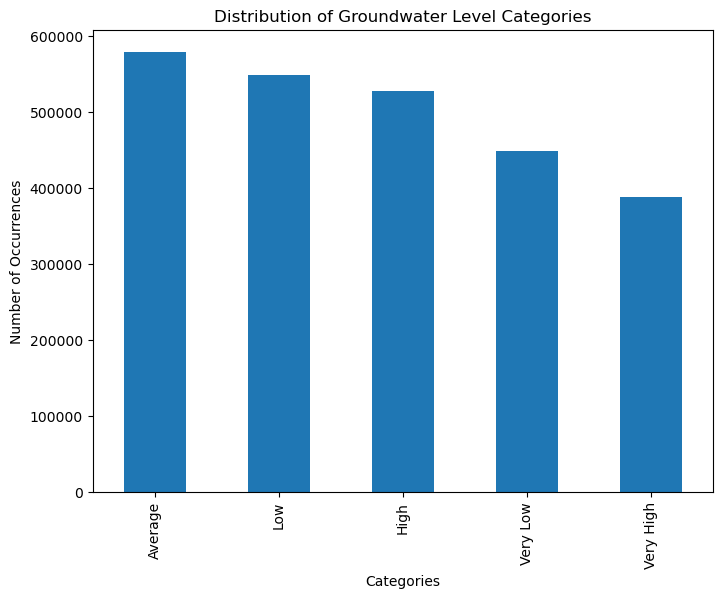

In [ ]:
# --- Analyzing the Distribution of the Target Column ---

# Step 1: Calculate the distribution of the target variable
# The value_counts() method counts the occurrences of each category in the column
target_distribution = data['piezo_groundwater_level_category'].value_counts()

# Step 2: Display the distribution as text output
# This provides a numerical summary of how many occurrences exist for each category
print(target_distribution)

# Step 3: Visualize the distribution using a bar chart
# Create a bar plot for the target variable distribution
target_distribution.plot(
    kind='bar',  # Specify a bar chart
    title="Distribution of Groundwater Level Categories",  # Add a title to the chart
    figsize=(8, 6)  # Set the size of the chart
)

# Add axis labels for better readability
plt.xlabel("Categories")  # Label for the x-axis (categories of the target variable)
plt.ylabel("Number of Occurrences")  # Label for the y-axis (frequency of each category)

# Display the bar chart
plt.show()


In [ ]:
# Étudier la relation entre les différentes variables et la variable à prédire 'piezo_groundwater_level_category'
import seaborn as sns
# 1. Scatter Plot entre 'piezo_station_altitude' et 'piezo_groundwater_level_category'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='piezo_station_altitude', y='piezo_groundwater_level_category')
plt.title("Scatter Plot: Altitude vs Catégorie de Niveau Piézométrique")
plt.xlabel("Altitude de la Station Piezo (mètres)")
plt.ylabel("Catégorie de Niveau Piézométrique")
plt.show()

# Analyse du Scatter Plot:
# Ce scatter plot permet de visualiser la relation entre l'altitude de la station et la catégorie du niveau piézométrique.
# On peut observer si une relation linéaire ou non existe entre ces deux variables.

# 2. Box Plot de 'piezo_station_investigation_depth' par rapport à 'piezo_groundwater_level_category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='piezo_groundwater_level_category', y='piezo_station_investigation_depth')
plt.title("Box Plot: Catégorie de Niveau Piézométrique vs Profondeur d'Investigation")
plt.xlabel("Catégorie de Niveau Piézométrique")
plt.ylabel("Profondeur d'Investigation (mètres)")
plt.show()

# Analyse du Box Plot:
# Ce box plot permet de visualiser la distribution des profondeurs d'investigation pour chaque catégorie de niveau piézométrique.
# Cela peut aider à identifier des tendances spécifiques en fonction de la profondeur de mesure.

# 3. Histogramme de 'piezo_groundwater_level_category'
plt.figure(figsize=(10, 6))
sns.histplot(data['piezo_groundwater_level_category'], bins=10, kde=True)
plt.title("Histogramme: Catégorie de Niveau Piézométrique")
plt.xlabel("Catégorie de Niveau Piézométrique")
plt.ylabel("Fréquence")
plt.show()

# Analyse de l'Histogramme:
# Cet histogramme montre la distribution des catégories de niveaux piézométriques des stations.
# Cela permet de déterminer si certaines catégories sont plus fréquentes et d'observer la symétrie de la distribution.

# 4. Scatter Plot entre 'insee_pop_commune' et 'piezo_groundwater_level_category'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='insee_pop_commune', y='piezo_groundwater_level_category')
plt.title("Scatter Plot: Population de la Commune vs Catégorie de Niveau Piézométrique")
plt.xlabel("Population de la Commune")
plt.ylabel("Catégorie de Niveau Piézométrique")
plt.show()

# Analyse du Scatter Plot:
# Ce scatter plot permet de visualiser la relation entre la population de la commune et la catégorie de niveau piézométrique.
# Cela peut aider à observer si la densité de population a une influence sur les niveaux de la nappe phréatique.

# 5. Box Plot pour 'hydro_observation_result_elab' par rapport à 'piezo_groundwater_level_category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='piezo_groundwater_level_category', y='hydro_observation_result_elab')
plt.title("Box Plot: Catégorie de Niveau Piézométrique vs Résultat de l'Observation Hydrologique")
plt.xlabel("Catégorie de Niveau Piézométrique")
plt.ylabel("Résultat de l'Observation Hydrologique (m³/s)")
plt.show()

# Analyse du Box Plot:
# Ce box plot permet de visualiser la distribution des résultats d'observation hydrologique pour chaque catégorie de niveau piézométrique.
# Cela peut permettre d'identifier si certaines catégories de niveaux piézométriques sont associées à des débits spécifiques.

# 6. Histogramme de la variable 'piezo_station_altitude' pour chaque 'piezo_groundwater_level_category'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='piezo_station_altitude', hue='piezo_groundwater_level_category', multiple='stack', bins=20)
plt.title("Histogramme Groupé: Altitude par Catégorie de Niveau Piézométrique")
plt.xlabel("Altitude de la Station Piezo (mètres)")
plt.ylabel("Fréquence")
plt.show()

# Analyse de l'Histogramme Groupé:
# Cet histogramme permet de visualiser la distribution des altitudes des stations par catégorie de niveau piézométrique.
# Cela peut montrer si certaines altitudes sont plus susceptibles d'avoir des catégories de niveaux piézométriques spécifiques.


## 

## Converting DTypes and calculating correlation

In [ ]:
from sklearn.preprocessing import LabelEncoder

# --- Encoding the Target Column Temporarily ---

# Use LabelEncoder to convert the target categorical variable into numeric format
# This is necessary to calculate correlations between numeric features and the target
le = LabelEncoder()
y_encoded = le.fit_transform(data['piezo_groundwater_level_category'])  # Encode the target variable as integers

# --- Calculating Correlation with the Target ---

# Select only numeric columns (float and int types) from the dataset
numeric_features = data.select_dtypes(include=['float64', 'int64'])

# Compute the absolute correlation between each numeric feature and the encoded target variable
correlation = numeric_features.corrwith(pd.Series(y_encoded)).abs()

# Sort the correlation values in descending order to identify the most correlated features
correlation = correlation.sort_values(ascending=False)

# --- Display the Top 10 Correlated Features ---

# Print the 10 features with the highest absolute correlation with the target variable
print("Top 10 most correlated features:")
print(correlation.head(10))


Top 10 most correlated features:
meteo_radiation_UV_max               0.073540
meteo_radiation_UV                   0.072620
meteo_evapotranspiration_Monteith    0.067801
meteo_evapotranspiration_grid        0.067030
meteo_temperature_max                0.061983
meteo_temperature_avg                0.061036
meteo_temperature_avg_threshold      0.061027
meteo_temperature_avg_tntm           0.061019
meteo_wetting_duration               0.056017
meteo_temperature_min_50cm           0.053897
dtype: float64


## Identifying Columns 

In [ ]:
# --- Identify Columns with Zero Variance ---

# Select numeric columns (float and int types) from the dataset
# Use the nunique() method to count the unique values in each column
# Lambda function filters columns with exactly one unique value, indicating zero variance
low_variance_columns = data.select_dtypes(include=['float64', 'int64']).nunique()[lambda x: x == 1].index

# Display columns with zero variance
# These columns are constant and do not provide useful information for analysis or modeling
print("Columns with zero variance:", list(low_variance_columns))

# --- Identify Columns with Missing Values ---

# Use isnull() to check for missing values in the dataset
# Sum the missing values for each column, then use a lambda function to filter columns with missing values
missing_values = data.isnull().sum()[lambda x: x > 0]

# Display columns with missing values
# These columns require attention for data cleaning (e.g., imputation or removal)
print("Columns with missing values:", list(missing_values.index))


Columns with zero variance: []
Columns with missing values: ['piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_producer_code', 'piezo_producer_name', 'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_rain_height', 'meteo_DRR', 'meteo_temperature_min', 'meteo_time_tn', 'meteo_temperature_max', 'meteo_time_tx', 'meteo_temperature_avg', 'meteo_temperature_avg_threshold', 'meteo_temperature_min_ground', 'meteo_temperature_min_50cm', 'meteo_frost_duration', 'meteo_amplitude_tn_tx', 'meteo_temperature_avg_tntm', 'meteo_pressure_avg', 'meteo_pression_maxi', 'meteo_wind_speed_avg_10m', 'meteo_wind_max', 'meteo_wind_direction_max_inst', 'meteo_time_wind_max', 'meteo_wind_avg', 'meteo_wind_direction_max_avg', 'meteo_time_wind_avg', 'meteo_wind_speed_avg_2m', 'meteo_wind_max_2m', 'meteo_wind_direction_max_inst_2m', 'meteo_time_wind_max_2m', 'meteo_wind_max_3s', 'meteo_time_wind_max_3s', 'meteo_humidity_min', 'meteo_time_humidity_min', 'meteo_humidity_max', 'meteo_time_

## Removing Columns with Zero Variance

In [ ]:
# --- Removing Columns with Zero Variance ---

# Drop the 'hydro_method_code' column, identified as having zero variance
# This column contains the same value for all rows, making it uninformative for analysis or modeling
data = data.drop(columns=['hydro_method_code'])

# Verify the number of columns remaining in the dataset after the removal
# The shape[1] attribute gives the number of columns in the dataset
print("Number of columns remaining after removal:", data.shape[1])


## Calculating Missing Value Percentages

In [ ]:
# --- Calculating Missing Value Percentages ---

# Step 1: Calculate the percentage of missing values for each column
# isnull().sum() counts the number of missing values in each column
# Dividing by the total number of rows (len(data)) and multiplying by 100 gives the percentage
missing_percentage = data.isnull().sum() / len(data) * 100

# Step 2: Filter columns with missing values (percentage > 0) and sort them in descending order
# This highlights columns with the highest percentage of missing values first
print("Columns with missing values (%) :")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


Columns with missing values (%) :
meteo_radiation_IR         99.998154
meteo_radiation_UV_max     99.765576
meteo_radiation_UV         99.765295
meteo_cloudiness           99.764090
meteo_cloudiness_height    99.764050
                             ...    
insee_pop_commune           0.986268
insee_med_living_level      0.986268
insee_%_ind                 0.986268
insee_%_const               0.986268
meteo_rain_height           0.799331
Length: 96, dtype: float64


## Removing Columns with High Percentage of Missing Values

In [ ]:
# --- Removing Columns with High Percentage of Missing Values ---

# Identify columns where more than 50% of the values are missing
# Use the missing_percentage Series calculated earlier to filter columns with >50% missing data
columns_to_drop = missing_percentage[missing_percentage > 50].index

# Drop the identified columns from the dataset
# Dropping these columns helps reduce noise and improves data quality for analysis or modeling
data = data.drop(columns=columns_to_drop)

# Verify the number of columns remaining after removal
# shape[1] gives the total number of columns in the dataset
print("Number of columns remaining after removal:", data.shape[1])


Number of columns remaining after removal: 90


## Removing Rows with Missing Values in Specific Columns

In [ ]:
# --- Removing Rows with Missing Values in Specific Columns ---

# Define a list of columns that must not have missing values
# Rows with missing values in any of these columns will be removed
columns_to_check = [
    'hydro_observation_result_elab', 'hydro_hydro_quantity_elab',
    'hydro_longitude', 'hydro_latitude', 'prelev_volume_0', 'prelev_longitude_0'
]

# Remove rows with missing values in the specified columns
# The dropna(subset=...) function ensures rows with NaN in any of these columns are excluded
X_cleaned = data.dropna(subset=columns_to_check)

# --- Verification After Removal ---

# Print the dimensions of the dataset after the rows with missing values are dropped
# This confirms the reduction in the dataset size
print(f"Data dimensions after removing rows with missing values: {X_cleaned.shape}")

# Check if any missing values remain in the specified columns
# This should output 0 for all the columns listed in 'columns_to_check'
print(f"Remaining missing values per column:\n{X_cleaned[columns_to_check].isnull().sum()}")


Data dimensions after removing rows with missing values: (2019908, 90)
Remaining missing values per column:
hydro_observation_result_elab    0
hydro_hydro_quantity_elab        0
hydro_longitude                  0
hydro_latitude                   0
prelev_volume_0                  0
prelev_longitude_0               0
dtype: int64


## Handling Remaining Missing Values

In [ ]:
# --- Handling Remaining Missing Values ---

# Identify columns with missing values between 0% and 50%
# These columns are eligible for imputation instead of being dropped
remaining_missing = missing_percentage[(missing_percentage > 0) & (missing_percentage <= 50)].index

# --- Imputation of Missing Values ---
for col in remaining_missing:
    if data[col].dtype in ['float64', 'int64']:  # For numeric columns
        # Fill missing values with the mean of the column
        data[col] = data[col].fillna(data[col].mean())
    else:  # For categorical columns
        # Fill missing values with the most frequent value (mode)
        data[col] = data[col].fillna(data[col].mode()[0])

# --- Verification After Imputation ---

# Check the total number of missing values remaining after imputation
# This should print 0 if all missing values were successfully filled
print("Remaining missing values after imputation:", data.isnull().sum().sum())


Remaining missing values after imputation: 0


## Selecting and Filtering Columns

In [ ]:
# --- Selecting and Filtering Columns ---

# Define a list of desired columns for the feature set (X)
# The list includes meteorological, geographical, and hydrogeological features
selected_columns = [col for col in [
    'meteo_rain_height', 'meteo_temperature_avg', 'piezo_station_latitude',
    'piezo_station_longitude', 'piezo_station_investigation_depth',
    'piezo_station_altitude', 'insee_pop_commune', 'insee_%_agri',
    'hydro_observation_result_elab', 'hydro_hydro_quantity_elab', 'prelev_volume_0'
] if col in data.columns]  # Filter to include only columns present in the dataset

# --- Creating Feature Matrix (X) and Target Vector (y) ---

# Create the feature matrix (X) using the selected columns
X = data[selected_columns]

# Create the target vector (y) using the target column
y = data['piezo_groundwater_level_category']

# --- Verification of Selected Data ---

# Print the final list of selected columns
print("Selected columns:", selected_columns)

# Print the dimensions of the feature matrix (X) and target vector (y)
# This confirms the shape of the dataset used for modeling
print("Data dimensions:")
print("X (features):", X.shape, "| y (target):", y.shape)


Selected columns: ['meteo_rain_height', 'meteo_temperature_avg', 'piezo_station_latitude', 'piezo_station_longitude', 'piezo_station_investigation_depth', 'piezo_station_altitude', 'insee_pop_commune', 'insee_%_agri', 'hydro_observation_result_elab', 'hydro_hydro_quantity_elab', 'prelev_volume_0']
Data dimensions:
X (features): (2491209, 11) | y (target): (2491209,)


## Defining Hierarchical Mapping for Target Encoding

In [ ]:
# --- Defining Hierarchical Mapping for Target Encoding ---

# Create a dictionary to map hierarchical categories to numeric values
# The mapping reflects an increasing order of severity or intensity
hierarchical_mapping = {
    "Very Low": 0,  # Lowest category mapped to 0
    "Low": 1,       # Second-lowest category mapped to 1
    "Average": 2,   # Middle category mapped to 2
    "High": 3,      # Second-highest category mapped to 3
    "Very High": 4  # Highest category mapped to 4
}

# --- Applying Hierarchical Encoding to the Target Variable ---

# Map the categorical target variable (y) to numeric values using the defined mapping
y_encoded = y.map(hierarchical_mapping)

# --- Verification ---

# Print the distribution of the encoded target categories
# This ensures that the mapping was applied correctly and displays the frequency of each numeric category
print("Distribution of encoded categories:")
print(y_encoded.value_counts())


Distribution of encoded categories:
piezo_groundwater_level_category
2    579363
1    548321
3    527212
0    449063
4    387250
Name: count, dtype: int64


## Plotting the Distribution of Encoded Categories

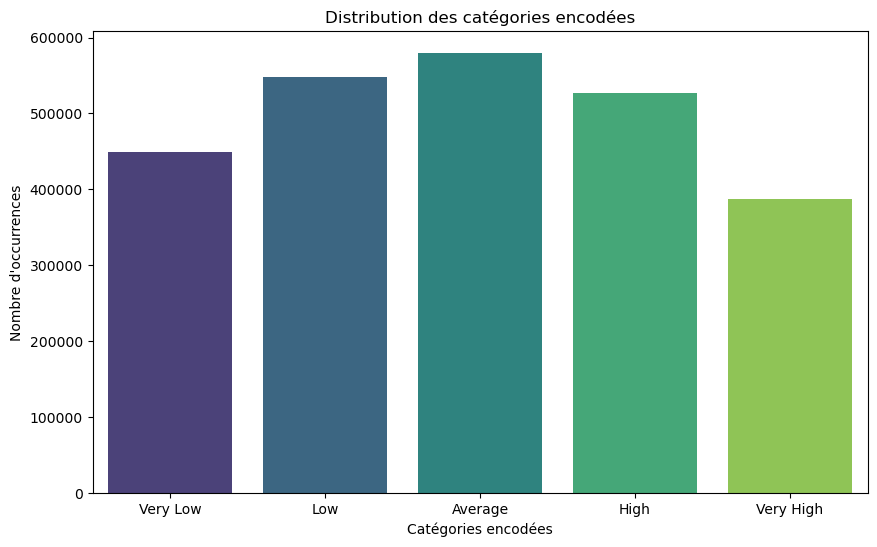

In [ ]:
# --- Plotting the Distribution of Encoded Categories ---

# Create a figure with custom dimensions
plt.figure(figsize=(10, 6))

# Use Seaborn's barplot to visualize the distribution of the encoded target categories
sns.barplot(
    x=y_encoded.value_counts().index,  # Categories (numeric values)
    y=y_encoded.value_counts().values,  # Frequency of each category
    palette="viridis"  # Color palette for the bars
)

# Add a title and labels to the plot
plt.title("Distribution of Encoded Categories")  # Title of the chart
plt.xlabel("Encoded Categories")  # Label for the x-axis
plt.ylabel("Number of Occurrences")  # Label for the y-axis

# Customize the x-axis ticks to display original category names
plt.xticks(ticks=range(5), labels=["Very Low", "Low", "Average", "High", "Very High"])

# Display the plot
plt.show()


## Data cleaning, preprocessing, and normalization

Non-numeric columns: ['insee_%_agri', 'hydro_hydro_quantity_elab']


/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


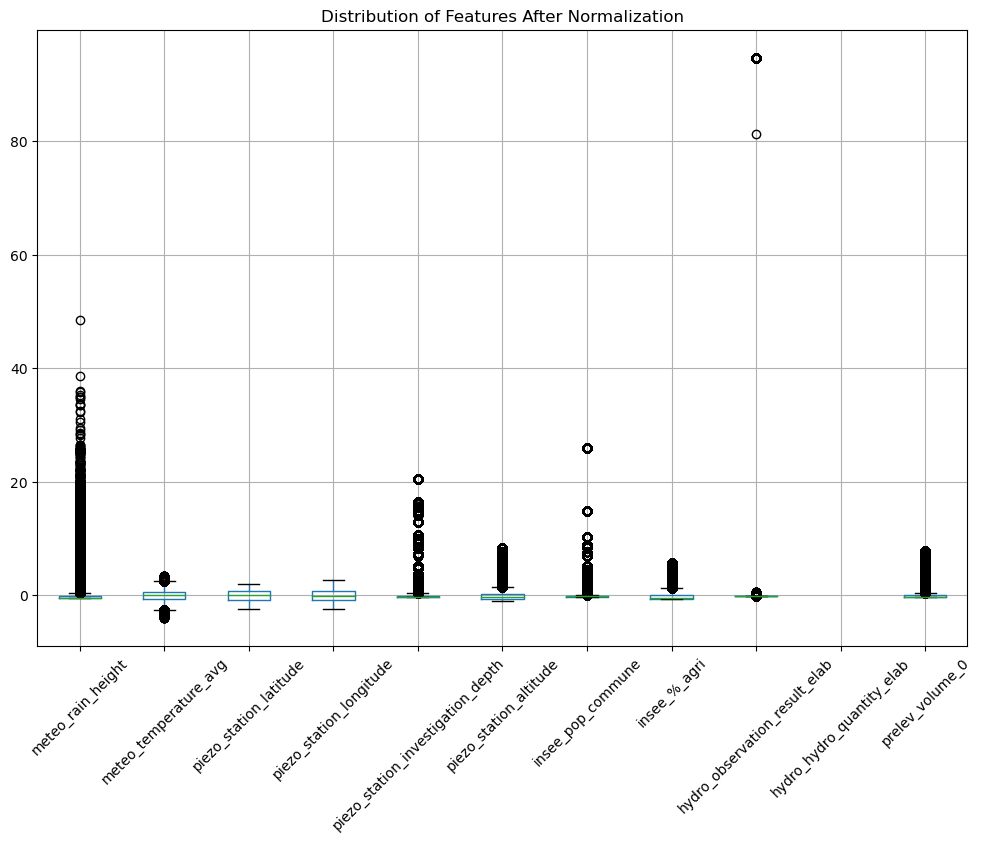

Dimensions of X after normalization: (2491209, 11)


In [ ]:
from sklearn.preprocessing import StandardScaler

# --- Step 1: Replace Invalid Values with NaN ---

# Replace common invalid entries (e.g., 'N/A - division par 0', empty strings) with NaN
# This ensures these values are treated as missing data for subsequent cleaning
X_cleaned = X.replace(['N/A - division par 0', 'NaN', '', None], np.nan)

# --- Step 2: Identify Non-Numeric Columns ---

# Select columns with non-numeric data types (e.g., strings, categorical variables)
# These columns may require conversion or exclusion
non_numeric_cols = X_cleaned.select_dtypes(include=['object', 'category']).columns
print(f"Non-numeric columns: {non_numeric_cols.tolist()}")

# --- Step 3: Attempt to Convert Non-Numeric Columns to Numeric ---

for col in non_numeric_cols:
    try:
        # Attempt to convert non-numeric columns to numeric
        # Invalid entries will be coerced to NaN
        X_cleaned[col] = pd.to_numeric(X_cleaned[col], errors='coerce')
    except Exception as e:
        # Log an error message if conversion fails
        print(f"Unable to convert column {col} to numeric: {e}")

# --- Step 4: Impute Missing Values with Column Means ---

# Fill missing values (NaN) in numeric columns with the column mean
# This ensures no missing values remain, enabling normalization
X_cleaned = X_cleaned.fillna(X_cleaned.mean())

# --- Step 5: Normalize Numeric Columns ---

# Use StandardScaler to standardize features to have zero mean and unit variance
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_cleaned)

# --- Step 6: Convert Normalized Data to DataFrame for Visualization ---

# Convert the normalized NumPy array back into a Pandas DataFrame
# Retain original column names for easier interpretation
X_normalized_df = pd.DataFrame(X_normalized, columns=X_cleaned.columns)

# --- Visualize Feature Distribution After Normalization ---

# Create a boxplot to visualize the distribution of features after normalization
plt.figure(figsize=(12, 8))  # Set figure size for better readability
X_normalized_df.boxplot()  # Create a boxplot for each feature
plt.title("Distribution of Features After Normalization")  # Add a title to the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()  # Display the plot

# --- Verify Dimensions of the Processed Data ---

# Print the dimensions of the normalized data to confirm the transformation
print("Dimensions of X after normalization:", X_normalized_df.shape)


## Calculate Correlation Matrix for Normalized Data 

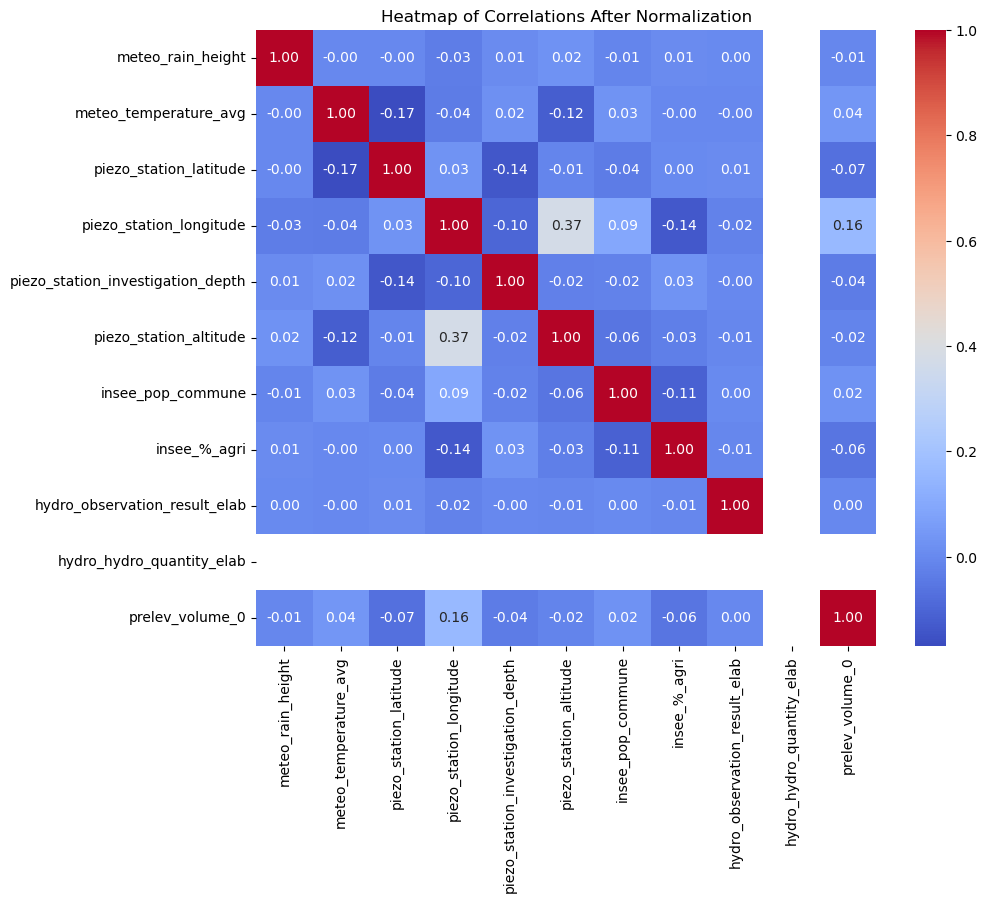

In [ ]:
# --- Calculate Correlation Matrix for Normalized Data ---

# Create a DataFrame from the normalized data (X_normalized) with the original column names
# This allows for easy calculation of the correlation matrix and visualization
correlation_matrix = pd.DataFrame(X_normalized, columns=X.columns).corr()

# --- Visualize the Correlation Matrix with a Heatmap ---

# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Use Seaborn's heatmap to visualize the correlation matrix
sns.heatmap(
    correlation_matrix,  # The correlation matrix to visualize
    annot=True,          # Annotate each cell with the correlation value
    cmap="coolwarm",     # Use the "coolwarm" color map for visual appeal
    fmt=".2f",           # Format the correlation values to two decimal places
    cbar=True            # Display a color bar for reference
)

# Add a title to the heatmap for context
plt.title("Heatmap of Correlations After Normalization")

# Display the heatmap
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y_encoded, test_size=0.2, random_state=42)

# Vérification des dimensions
print("Dimensions de l'ensemble d'entraînement :", X_train.shape, "|", y_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape, "|", y_test.shape)


Dimensions de l'ensemble d'entraînement : (1992967, 11) | (1992967,)
Dimensions de l'ensemble de test : (498242, 11) | (498242,)


In [ ]:
# Import the SimpleImputer to handle NaN values
from sklearn.impute import SimpleImputer

# Imputer pour remplacer les valeurs NaN par la moyenne
imputer = SimpleImputer(strategy="mean")

# Appliquer l'imputation aux ensembles d'entraînement et de test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [ ]:

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and fit the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Utiliser les données imputées pour entraîner le modèle
rf_clf.fit(X_train_imputed, y_train)

# Predict on the test set using the imputed test data
y_pred = rf_clf.predict(X_test_imputed)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Very Low", "Low", "Average", "High", "Very High"]))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

from joblib import dump, load
dump(rf_clf, 'random_forest_model.joblib')
print("Model saved successfully!")




Classification Report:
              precision    recall  f1-score   support

    Very Low       0.85      0.83      0.84     89641
         Low       0.76      0.75      0.76    110013
     Average       0.74      0.74      0.74    115810
        High       0.74      0.75      0.74    105567
   Very High       0.81      0.81      0.81     77211

    accuracy                           0.77    498242
   macro avg       0.78      0.78      0.78    498242
weighted avg       0.77      0.77      0.77    498242

Confusion Matrix:
[[74829  9975  2766  1381   690]
 [ 9429 82954 12605  3498  1527]
 [ 2524 11996 85538 12821  2931]
 [ 1122  2858 12937 79128  9522]
 [  532  1176  2523 10139 62841]]
Model saved successfully!


In [ ]:
from sklearn.metrics import f1_score
# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
print("F1-score (weighted):", f1)


F1-score (weighted): 0.7734125559742155


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and fit the Random Forest Classifier
rf1_clf = RandomForestClassifier(random_state=42)
X_normalized_df_impute=imputer.fit_transform(X_normalized_df)
rf1_clf.fit(X_normalized_df_impute,y_encoded)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
test_data=pd.read_csv('/home/jovyan/hfactory_magic_folders/water_shortage_prediction/X_test_Hi5.csv')
# Convertir les colonnes de type date
test_data['piezo_station_update_date'] = pd.to_datetime(test_data['piezo_station_update_date'], errors='coerce')
test_data['piezo_measurement_date'] = pd.to_datetime(test_data['piezo_measurement_date'], errors='coerce')

# Vérifier les premières valeurs
print(test_data[['piezo_station_update_date', 'piezo_measurement_date']].head())
selected_columns = [col for col in [
   'meteo_rain_height', 'meteo_temperature_avg', 'piezo_station_latitude',
    'piezo_station_longitude', 'piezo_station_investigation_depth',
    'piezo_station_altitude', 'insee_pop_commune', 'insee_%_agri',
    'hydro_observation_result_elab', 'hydro_hydro_quantity_elab', 'prelev_volume_0'

] if col in data.columns]

# Créer un nouveau dataset avec les colonnes sélectionnées
X_test = test_data[selected_columns]


# Étape 1 : Remplacer les valeurs invalides par NaN
X_test_cleaned = X_test.replace(['N/A - division par 0', 'NaN', '', None], np.nan)

# Étape 2 : Identifier les colonnes non numériques
non_numeric_cols = X_test_cleaned.select_dtypes(include=['object', 'category']).columns
print(f"Colonnes non numériques : {non_numeric_cols.tolist()}")

# Étape 3 : Supprimer les colonnes non convertibles ou les convertir en numérique si possible
for col in non_numeric_cols:
    try:
        # Essayer de convertir les colonnes en numérique
        X_test_cleaned[col] = pd.to_numeric(X_test_cleaned[col], errors='coerce')
    except Exception as e:
        print(f"Impossible de convertir la colonne {col} : {e}")

# Étape 4 : Imputer les valeurs manquantes avec la moyenne des colonnes numériques
X_test_cleaned = X_test_cleaned.fillna(X_cleaned.mean())

# Étape 5 : Normaliser les colonnes numériques
scaler = StandardScaler()
X_test_normalized = scaler.fit_transform(X_test_cleaned)

# Étape 6 : Convertir en DataFrame pour visualisation
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test_cleaned.columns)

# Vérification des dimensions après normalisation
print("Dimensions de X après normalisation :", X_test_normalized_df.shape)
X_test_normalized_df_impute=imputer.fit_transform(X_test_normalized_df)
y_sub=rf1_clf.predict(X_test_normalized_df_impute)



/tmp/ipykernel_12105/2413759785.py:5: DtypeWarning: Columns (1,5,108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data=pd.read_csv('/home/jovyan/hfactory_magic_folders/water_shortage_prediction/X_test_Hi5.csv')
/opt/conda/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


  piezo_station_update_date piezo_measurement_date
0       2024-07-14 13:00:02             2022-06-01
1       2024-07-14 13:00:02             2022-06-01
2       2024-07-14 13:00:02             2022-06-01
3       2024-07-14 13:00:02             2022-06-01
4       2024-07-14 13:00:02             2022-06-01
Colonnes non numériques : ['insee_%_agri', 'hydro_hydro_quantity_elab']


/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Dimensions de X après normalisation : (611208, 11)


In [ ]:
y_template=pd.read_csv("/home/jovyan/hfactory_magic_folders/water_shortage_prediction/y_test_submission_example_Hi5.csv")
print(y_template.head())
print(y_template.describe())
print(y_template.info())


   row_index piezo_groundwater_level_category
0    2331795                    My prediction
1    2331796                    My prediction
2    2331797                    My prediction
3    2331798                    My prediction
4    2331799                    My prediction
          row_index
count  6.112080e+05
mean   2.968373e+06
std    4.882527e+05
min    2.331795e+06
25%    2.492081e+06
50%    2.652332e+06
75%    3.450996e+06
max    3.610822e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611208 entries, 0 to 611207
Data columns (total 2 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   row_index                         611208 non-null  int64 
 1   piezo_groundwater_level_category  611208 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.3+ MB
None


In [ ]:

test_data=pd.read_csv('/home/jovyan/hfactory_magic_folders/water_shortage_prediction/X_test_Hi5.csv')
# Convertir les colonnes de type date
test_data['piezo_station_update_date'] = pd.to_datetime(test_data['piezo_station_update_date'], errors='coerce')
test_data['piezo_measurement_date'] = pd.to_datetime(test_data['piezo_measurement_date'], errors='coerce')

# Vérifier les premières valeurs
print(test_data[['piezo_station_update_date', 'piezo_measurement_date']].head())
selected_columns = [col for col in [
   'meteo_rain_height', 'meteo_temperature_avg', 'piezo_station_latitude',
    'piezo_station_longitude', 'piezo_station_investigation_depth',
    'piezo_station_altitude', 'insee_pop_commune', 'insee_%_agri',
    'hydro_observation_result_elab', 'hydro_hydro_quantity_elab', 'prelev_volume_0'
] if col in data.columns]

# Créer un nouveau dataset avec les colonnes sélectionnées
X_test = test_data[selected_columns]
# #Sorting dates
# X_test = data.sort_values(by='piezo_measurement_date')  
# #adding lag
# X_test['piezo_measurement_date'] = X_test['piezo_measurement_date'].shift(7) 

# Étape 1 : Remplacer les valeurs invalides par NaN
X_test_cleaned = X_test.replace(['N/A - division par 0', 'NaN', '', None], np.nan)

# Étape 2 : Identifier les colonnes non numériques
non_numeric_cols = X_test_cleaned.select_dtypes(include=['object', 'category']).columns
print(f"Colonnes non numériques : {non_numeric_cols.tolist()}")

# Étape 3 : Supprimer les colonnes non convertibles ou les convertir en numérique si possible
for col in non_numeric_cols:
    try:
        # Essayer de convertir les colonnes en numérique
        X_test_cleaned[col] = pd.to_numeric(X_test_cleaned[col], errors='coerce')
    except Exception as e:
        print(f"Impossible de convertir la colonne {col} : {e}")

# Étape 4 : Imputer les valeurs manquantes avec la moyenne des colonnes numériques
X_test_cleaned = X_test_cleaned.fillna(X_cleaned.mean())

# Étape 5 : Normaliser les colonnes numériques
scaler = StandardScaler()
X_test_normalized = scaler.fit_transform(X_test_cleaned)

# Étape 6 : Convertir en DataFrame pour visualisation
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test_cleaned.columns)



# Vérification des dimensions après normalisation
print("Dimensions de X après normalisation :", X_test_normalized_df.shape)
X_test_normalized_df_impute=imputer.fit_transform(X_test_normalized_df)
y_sub=rf1_clf.predict(X_test_normalized_df_impute)



/tmp/ipykernel_12105/3326621588.py:5: DtypeWarning: Columns (1,5,108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data=pd.read_csv('/home/jovyan/hfactory_magic_folders/water_shortage_prediction/X_test_Hi5.csv')
/opt/conda/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


  piezo_station_update_date piezo_measurement_date
0       2024-07-14 13:00:02             2022-06-01
1       2024-07-14 13:00:02             2022-06-01
2       2024-07-14 13:00:02             2022-06-01
3       2024-07-14 13:00:02             2022-06-01
4       2024-07-14 13:00:02             2022-06-01
Colonnes non numériques : ['insee_%_agri', 'hydro_hydro_quantity_elab']


/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Dimensions de X après normalisation : (611208, 11)


In [ ]:
y_sub_df.to_csv('output.csv', index=False)